El archivo globos.csv contiene el registro de 16 intentos para inflar globos. Los atributos registrados fueron el color del globo, el tamaño, si se estira o no y si la acción de inflarlo fue realizada por un adulto o por un niño. En cada registro se anotó si el globo pudo ser inflado o no.

Numerice los atributos de la siguiente forma:

● Color = 1 si es rojo y 0 si es amarillo

● SeEstira? = 1 para Si y 0 para No

● Edad = 1 si es adulto y 0 si es Nene

● Tamanio = 0 si es Chico, 0.5 si es mediano y 1 si es grande

a) Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos normalizados del archivo Globos.csv

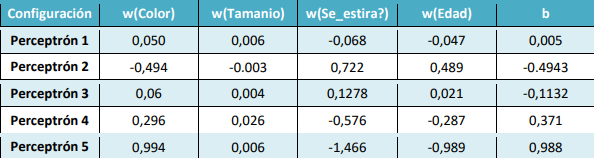

b) Indique cuál de los 5 perceptrones del inciso anterior presenta el peor desempeño, es decir, cuál es el
que clasifica la menor cantidad de ejemplos correctamente.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Cargar el archivo globos.csv con encoding UTF-8-SIG para eliminar el BOM
df = pd.read_csv('../../Datos/globos.csv', sep=',', encoding='utf-8-sig')

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

print("Datos originales:")
display(df)

# Numerizar los atributos según las instrucciones
df_num = df.copy()

# Color: 1 si es Rojo, 0 si es Amarillo
df_num['Color'] = (df['Color'].str.strip() == 'Rojo').astype(int)

# Tamanio: 0 si es Chico, 0.5 si es Mediano, 1 si es Grande
tamanio_map = {'Chico': 0, 'Mediano': 0.5, 'Grande': 1}
df_num['Tamanio'] = df['Tamanio'].str.strip().map(tamanio_map)

# Se_estira?: 1 para Si, 0 para No
df_num['Se_estira?'] = (df['Se_estira?'].str.strip() == 'Si').astype(int)

# Edad: 1 si es Adulto, 0 si es Nene
df_num['Edad'] = (df['Edad'].str.strip() == 'Adulto').astype(int)

# Inflado?: 1 si es Si, 0 si es No
df_num['Inflado?'] = (df['Inflado?'].str.strip() == 'Si').astype(int)

print("\nDatos numerizados:")
display(df_num)

# Separar atributos y clase (orden: Color, Tamanio, SeEstira, Edad)
X = df_num[['Color', 'Tamanio', 'Se_estira?', 'Edad']].values
T = df_num['Inflado?'].values

print("\nMatriz de atributos (X):")
print(X)
print("\nClases (T):")
print(T)

# Normalizar usando StandardScaler (tipificación)
normalizador = StandardScaler()
X_norm = normalizador.fit_transform(X)

print("\nDatos normalizados:")
print(X_norm)

# Configuraciones de perceptrones
perceptrones = {
    'Perceptrón 1': {'w_Color': 0.050, 'w_Tamanio': 0.006, 'w_SeEstira': -0.068, 'w_Edad': -0.047, 'b': 0.005},
    'Perceptrón 2': {'w_Color': -0.494, 'w_Tamanio': -0.003, 'w_SeEstira': 0.722, 'w_Edad': 0.489, 'b': -0.4943},
    'Perceptrón 3': {'w_Color': 0.06, 'w_Tamanio': 0.004, 'w_SeEstira': 0.1278, 'w_Edad': 0.021, 'b': -0.1132},
    'Perceptrón 4': {'w_Color': 0.296, 'w_Tamanio': 0.026, 'w_SeEstira': -0.576, 'w_Edad': -0.287, 'b': 0.371},
    'Perceptrón 5': {'w_Color': 0.994, 'w_Tamanio': 0.006, 'w_SeEstira': -1.466, 'w_Edad': -0.989, 'b': 0.988}
}

# Función para evaluar un perceptrón
def evaluar_perceptron(X_norm, T, config):
    predicciones = []
    for i in range(len(X_norm)):
        neta = (config['w_Color'] * X_norm[i, 0] + 
                config['w_Tamanio'] * X_norm[i, 1] + 
                config['w_SeEstira'] * X_norm[i, 2] + 
                config['w_Edad'] * X_norm[i, 3] + 
                config['b'])
        y = 1 if neta > 0 else 0
        predicciones.append(y)
    
    predicciones = np.array(predicciones)
    aciertos = sum(predicciones == T)
    porcentaje = 100 * aciertos / len(T)
    
    return predicciones, aciertos, porcentaje

# Evaluar cada perceptrón
print("\n" + "=" * 80)
print("EVALUACIÓN DE PERCEPTRONES")
print("=" * 80)

resultados = {}
for nombre, config in perceptrones.items():
    pred, aciertos, porcentaje = evaluar_perceptron(X_norm, T, config)
    resultados[nombre] = {
        'aciertos': aciertos,
        'porcentaje': porcentaje
    }
    
    print(f"\n{nombre}: {aciertos}/{len(T)} ({porcentaje:.2f}%)")
    print(f"  {'✓ Clasifica TODOS correctamente' if aciertos == len(T) else '✗ NO clasifica todos'}")

# RESPUESTA EJERCICIO A
print("\n" + "=" * 80)
print("A)")
print("=" * 80)
print("Perceptrones que clasifican correctamente TODOS los ejemplos:")
for nombre, res in resultados.items():
    if res['aciertos'] == len(T):
        print(f"  ✓ {nombre}")

# RESPUESTA EJERCICIO B
print("\n" + "=" * 80)
print("B)")
print("=" * 80)
peor = min(resultados.items(), key=lambda x: x[1]['aciertos'])
print(f"El perceptrón con PEOR desempeño es: {peor[0]}")
print(f"Aciertos: {peor[1]['aciertos']}/{len(T)} ({peor[1]['porcentaje']:.2f}%)")

Datos originales:


,Color,Tamanio,Se_estira?,Edad,Inflado?
0,Amarillo,Chico,Si,Adulto,Si
1,Amarillo,Chico,Si,Nene,Si
2,Amarillo,Chico,No,Adulto,No
3,Amarillo,Chico,No,Nene,No
4,Amarillo,Grande,Si,Adulto,Si
5,Amarillo,Grande,Si,Nene,Si
6,Amarillo,Mediano,No,Adulto,No
7,Amarillo,Mediano,No,Nene,No
8,Rojo,Chico,Si,Adulto,Si
9,Rojo,Chico,Si,Nene,No



Datos numerizados:


,Color,Tamanio,Se_estira?,Edad,Inflado?
0,0,0.0,1,1,1
1,0,0.0,1,0,1
2,0,0.0,0,1,0
3,0,0.0,0,0,0
4,0,1.0,1,1,1
5,0,1.0,1,0,1
6,0,0.5,0,1,0
7,0,0.5,0,0,0
8,1,0.0,1,1,1
9,1,0.0,1,0,0



Matriz de atributos (X):
[[0.  0.  1.  1. ]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.  0.  0. ]
 [0.  1.  1.  1. ]
 [0.  1.  1.  0. ]
 [0.  0.5 0.  1. ]
 [0.  0.5 0.  0. ]
 [1.  0.  1.  1. ]
 [1.  0.  1.  0. ]
 [1.  0.5 0.  1. ]
 [1.  0.5 0.  0. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  0. ]
 [1.  1.  0.  1. ]
 [1.  1.  0.  0. ]]

Clases (T):
[1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0]

Datos normalizados:
[[-1.         -1.15470054  1.          1.        ]
 [-1.         -1.15470054  1.         -1.        ]
 [-1.         -1.15470054 -1.          1.        ]
 [-1.         -1.15470054 -1.         -1.        ]
 [-1.          1.15470054  1.          1.        ]
 [-1.          1.15470054  1.         -1.        ]
 [-1.          0.         -1.          1.        ]
 [-1.          0.         -1.         -1.        ]
 [ 1.         -1.15470054  1.          1.        ]
 [ 1.         -1.15470054  1.         -1.        ]
 [ 1.          0.         -1.          1.        ]
 [ 1.          0.         -1.         -1